## Exploring data

The first step before actually delving into the data is to import all relevant modules that will be needed for conducting further data analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Now, we can get to exploring the data that we currently have. Basically, the data to be subsequently used is contained in the following five csv-files:

* `calls.csv` => data on users' calls;
* `internet.csv` => data on users' internet-sessions;
* `messages.csv` => data on users' messages;
* `tariffs.csv` => data on tariffs available; 
* `users.csv` => data on company's users. 

Consider each of the aforementioned datasets in detail.

### Calls

Firstly, let's deal with data on calls made by users which is given in `calls.csv`. Read this dataset into a DataFrame `calls`.

In [2]:
calls = pd.read_csv("calls.csv")

It can be noticed in the datasets to be considered that columns called `Unnamed: 0` or `Unnamed: 0.1` are present. This is the result of uploading data by specifying the index (`df.to_csv(..., index=column)`). These columns are not needed in the analysis and therefore can be freely deleted. Hence, we can print the first five rows of the DataFrame while deleting unnecessary columns.

In [3]:
calls = calls.drop(["Unnamed: 0"], axis=1)
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Next, consider a concise summary of this DataFrame by calling `info()` method.

In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


We notice that this DataFrame has 4 columns which have different data types: `int64`, `float64` and `object`. There are the following columns:

<table>
<thead>
<tr><th>Features</th><th>Description</th></tr>
</thead>
<tbody>
<tr><td><code>id</code></td><td><i>Unique identification number of a call</i></td></tr>
<tr><td><code>call_date</code></td><td><i>Date of a call</i></td></tr>
<tr><td><code>duration</code></td><td><i>Duration of a call (minutes)</i></td></tr>
<tr><td><code>user_id</code></td><td><i>Identifier of a user who made a call</i></td></tr>
</tbody>
</table>

It can also be noticed that the number of non-null rows is equal to the total number of rows which means that we do not have any missing values.

Let's think about how the data on the duration of calls is distributed by printing its histogram.

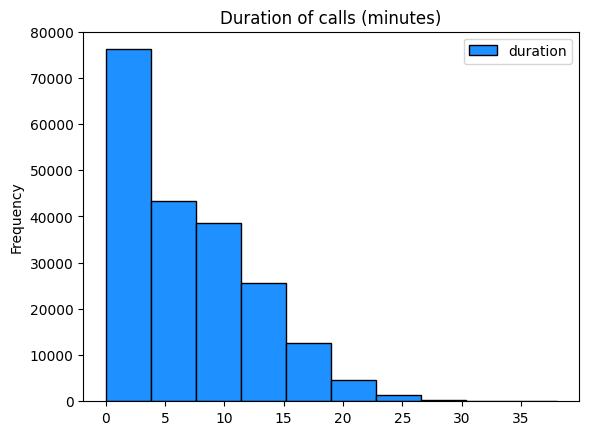

In [5]:
# Plotting a histogram for 'duration' column
calls.plot(
    y="duration",
    kind="hist",
    edgecolor="k",
    color="dodgerblue",
    title="Duration of calls (minutes)",
)
plt.show()

We observe that the distribution of call duration is skewed in the positive direction, where there are a lot of calls that took place between 0 and 4 minutes.

### Internet sessions

Next, do the exact same for all other remaining datasets. In this part, focus on the on internet sessions contained in `internet.csv`. Let's read it into `sessions` DataFrame.

In [6]:
sessions = pd.read_csv("internet.csv")

Print the first five rows of the DataFrame to get the idea of what it looks like.

In [7]:
sessions = sessions.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)
sessions.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Consider a detailed summary of the DataFrame.

In [8]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


There are 4 columns with `float64`, `int64` and `object` data types:

<table>
<thead>
<tr><th>Features</th><th>Description</th></tr>
</thead>
<tbody>
<tr><td><code>id</code></td><td><i>Unique identification number of a session</i></td></tr>
<tr><td><code>mb_used</code></td><td><i>Amount of internet traffic spent per session (megabytes, MB)</i></td></tr>
<tr><td><code>session_date</code></td><td><i>Date of a session</i></td></tr>
<tr><td><code>user_id</code></td><td><i>Identifier of a user</i></td></tr>
</tbody>
</table>

Again, we observe the absence of missing values.

Now, let's plot a histogram for the amount of megabytes spent.

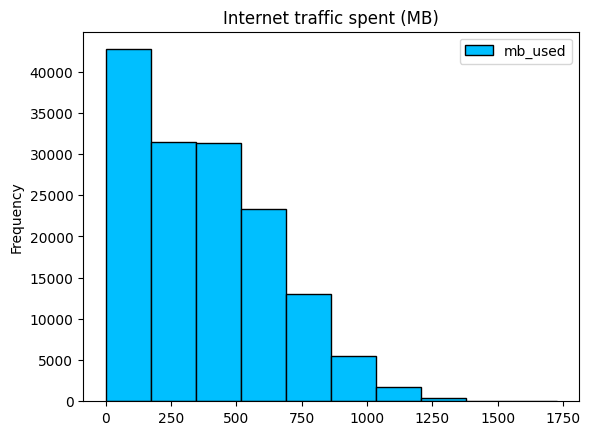

In [9]:
# Plotting a histogram for 'mb_used' column
sessions.plot(
    y="mb_used",
    kind="hist",
    edgecolor="k",
    color="deepskyblue",
    title="Internet traffic spent (MB)",
)
plt.show()

### Messages

The next dataset to be considered is data on messages - `messages.csv`.

In [10]:
messages = pd.read_csv("messages.csv")

Print the first five rows of `messages` DataFrame.

In [11]:
messages = messages.drop(["Unnamed: 0"], axis=1)
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Now, let's consider a concise summary of the data on messages.

In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


The DataFrame has only 3 columns of either `int64` or `object` data type. Columns include:

<table>
<thead>
<tr><th>Features</th><th>Description</th></tr>
</thead>
<tbody>
<tr><td><code>id</code></td><td><i>Unique message number</i></td></tr>
<tr><td><code>message_date</code></td><td><i>Date of a message</i></td></tr>
<tr><td><code>user_id</code></td><td><i>Identifier of a user who sent a message</i></td></tr>
</tbody>
</table>

### Tariffs

Information about tariffs offered by the company can be consulted in `tariffs.csv` file. Let's convert it to a DataFrame and consider it in detail.

In [13]:
tariffs = pd.read_csv("tariffs.csv")

In [14]:
tariffs = tariffs.drop(["Unnamed: 0"], axis=1)
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [15]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Basically, this DataFrame just includes detailed description of two tariffs offered by the company. These tariff features involve:

<table>
<thead>
<tr><th>Features</th><th>Description</th></tr>
</thead>
<tbody>
<tr><td><code>messages_included</code></td><td><i>Number of messages per month included in the subscription fee</i></td></tr>
<tr><td><code>mb_per_month_included</code></td><td><i>Amount of internet traffic included in the subscription fee (megabytes)</i></td></tr>
<tr><td><code>minutes_included</code></td><td><i>Number of minutes per month included in the subscription fee</i></td></tr>
<tr><td><code>rub_monthly_fee</code></td><td><i>monthly subscription fee (rubles)</i></td></tr>
<tr><td><code>rub_per_gb</code></td><td><i>cost of an additional gigabyte of internet traffic in excess of the tariff package (rubles)</i></td></tr>
<tr><td><code>rub_per_message</code></td><td><i>cost of sending a message in excess of the tariff package (rubles)</i></td></tr>
<tr><td><code>tariff_name</code></td><td><i>Name of a tariff</i></td></tr>
</tbody>
</table>

### Users

Lastly, consider information we have about the users.

In [16]:
users = pd.read_csv("users.csv")

In [17]:
users = users.drop(["Unnamed: 0"], axis=1)
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


The data on 500 users consists of the following columns:

<table>
<thead>
<tr><th>Features</th><th>Description</th></tr>
</thead>
<tbody>
<tr><td><code>user_id</code></td><td><i>Unique user id</i></td></tr>
<tr><td><code>age</code></td><td><i>User's age (years)</i></td></tr>
<tr><td><code>churn_date</code></td><td><i>date of termination of use of the tariff (if the value is omitted, it means that the tariff was still valid at the time of data upload)</i></td></tr>
<tr><td><code>city</code></td><td><i>City of user's residence</i></td></tr>
<tr><td><code>first_name</code></td><td><i>User's first name</i></td></tr>
<tr><td><code>last_name</code></td><td><i>User's last name</i></td></tr>
<tr><td><code>reg_date</code></td><td><i>Tariff activation date (day, month, year)</i></td></tr>
<tr><td><code>tariff</code></td><td><i>Name of a tariff plan</i></td></tr>
</tbody>
</table>

**Conclusion**

All in all, we have managed to get acquainted with five DataFrames that will be used to conduct data analysis. In general, the problem of missing values is not so serious here, most datasets have data entries complete with full information.  

## Data preparation

### Working with dates

We have seen that almost all DataFrames have date variables which are actually of `object` data type. It is reasonable to convert their type to `datetime` by applying `to_datetime()` method.

In [19]:
# Conversion to datetime
users["reg_date"] = pd.to_datetime(users["reg_date"], format="%Y-%m-%d")
users["churn_date"] = pd.to_datetime(users["churn_date"], format="%Y-%m-%d")
calls["call_date"] = pd.to_datetime(calls["call_date"], format="%Y-%m-%d")
messages["message_date"] = pd.to_datetime(messages["message_date"], format="%Y-%m-%d")
sessions["session_date"] = pd.to_datetime(sessions["session_date"], format="%Y-%m-%d")

The histogram of `duration` column in `calls` DataFrame showed that there are actually quite a lot of calls that took place zero minutes. This is not a mistake: it refers to missed calls so they should not be deleted.

However, the values in this column are fractional. Thus, we need to round these values up by making use of `numpy.ceil()` method and then converting their type to `int64`.

In [20]:
# Rounding up and conversion to int64
calls["duration"] = (np.ceil(calls["duration"])).astype("int64")

Next, let's retrieve the month numbers from the following date variables: `call_date`, `message_date`, `session_date`.

In [21]:
# Retrieving month numbers
calls["month"] = calls["call_date"].dt.month
messages["month"] = messages["message_date"].dt.month
sessions["month"] = sessions["session_date"].dt.month

### Grouping data

After getting data on dates in order, we can start to create different groupings for users for each month. We will compute four different groupings:

* `calls_per_month` => number of calls made by each user in each available month;
* `minutes_per_month` => amount of minutes spent by each user in each available month;
* `messages_per_month` => number of messages sent by each user in each available month;
* `sessions_per_month` => amount of internet traffic spent (megabytes) by each user in each available month.

Afterwards, these data will be merged together for conducting a more in-depth analysis.

In [22]:
# Calculating the number of calls made for each user by month
calls_per_month = calls.groupby(["user_id", "month"]).agg(calls=("duration", "count"))

calls_per_month.head(30)

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33
        11        32
        12        33
1003    8         55
        9        134
        10       108
        11       115
        12       108
1004    5          9
        6         31
        7         22
        8         19
        9         26
        10        29
        11        19
        12        21

In [23]:
# Calculating the amount of minutes spent for each user by month
minutes_per_month = calls.groupby(["user_id", "month"]).agg(minutes=("duration", "sum"))

minutes_per_month.head(30)

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414
1002    6          117
        7          214
        8          289
        9          206
        10         212
        11         243
        12         236
1003    8          380
        9          961
        10         855
        11         824
        12         802
1004    5           35
        6          171
        7          135
        8          137
        9          117
        10         145
        11         117
        12         130

In [24]:
# Calculating the number of messages sent for each user by month
messages_per_month = messages.groupby(["user_id", "month"]).agg(
    messages=("message_date", "count")
)

messages_per_month.head(30)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12
1003    8            37
        9            91
        10           83
        11           94
        12           75
1004    5            95
        6           134
        7           181
        8           151
        9           146
        10          165
        11          158
        12          162
1005    1             7
        2            38

In [25]:
# Calculating the amount of megabytes spent for each user by month
sessions_per_month = sessions.groupby(["user_id", "month"]).agg({"mb_used": "sum"})

sessions_per_month.head(30)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25
        11     18587.28
        12     18113.73
1003    8       8565.21
        9      12468.87
        10     14768.14
        11     11356.89
        12     10121.53
1004    5      13403.98
        6      17600.02
        7      22229.58
        8      28584.37
        9      15109.03
        10     18475.44
        11     15616.02
        12     18021.04

**Conclusion**

At the stage of data preparation, columns containing dates have been worked out by data conversion and month number retrieval. This has allowed computing a few data grouping that will be necessary at the next stage of data analysis.

## Exploratory data analysis

### Computing revenue

Since the main goal of the present analysis is to indentify the optimal tariff, let's compute revenues brought by each tariff. For that, first, we can add all grouping variables computed above to one DataFrame called `user_behavior` and merge the resulting DataFrame with `users` containing other infomation about a particular user. Hence, each "user-month" pair will contain information about the tariff, the number of calls, messages and megabytes spent.

In [26]:
# Merging all DataFrames together
user_behavior = (
    calls_per_month.merge(
        messages_per_month, left_index=True, right_index=True, how="outer"
    )
    .merge(sessions_per_month, left_index=True, right_index=True, how="outer")
    .merge(minutes_per_month, left_index=True, right_index=True, how="outer")
    .reset_index()
    .merge(users, how="left", left_on="user_id", right_on="user_id")
)
user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Let's check missing values in the merged DataFrame.

In [27]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

We can fill in the missing values in the data by just replacing `NaN` with zeros.

In [28]:
# Filling in missing values
cols_to_fill_in = ["calls", "minutes", "messages", "mb_used"]
for col in cols_to_fill_in:
    user_behavior[col] = user_behavior[col].fillna(0)

Now, let's also add numeric information about tariffs to `user_behavior`. For that, first, rename the column in `tariffs` DataFrame.

In [29]:
# Renaming a column
tariffs = tariffs.rename(columns={"tariff_name": "tariff"})

In [30]:
# Adding tariff name to the merged DataFrame
user_behavior = user_behavior.merge(tariffs, on="tariff")

Compute the number of minutes, messages and megabytes exceeding those included in the tariff.

In [31]:
# Auxiliary calculations
user_behavior["paid_minutes"] = (
    user_behavior["minutes"] - user_behavior["minutes_included"]
)
user_behavior["paid_messages"] = (
    user_behavior["messages"] - user_behavior["messages_included"]
)
user_behavior["paid_mb"] = (
    user_behavior["mb_used"] - user_behavior["mb_per_month_included"]
)

for col in ["paid_messages", "paid_minutes", "paid_mb"]:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

Convert megabytes that exceed the tariff to gigabytes and save the result to a new column `paid_gb`.

In [32]:
# Auxiliary calculations
user_behavior["paid_gb"] = np.ceil(user_behavior["paid_mb"] / 1024).astype(int)

Compute revenue for minutes, messages and internet.

In [33]:
# Computing revenues
user_behavior["cost_minutes"] = (
    user_behavior["paid_minutes"] * user_behavior["rub_per_minute"]
)
user_behavior["cost_messages"] = (
    user_behavior["paid_messages"] * user_behavior["rub_per_message"]
)
user_behavior["cost_gb"] = user_behavior["paid_gb"] * user_behavior["rub_per_gb"]

Finally, we can compute monthly revenue obtained from each user.

In [34]:
# Calculating total monthly revenue by user
user_behavior["total_cost"] = (
    user_behavior["rub_monthly_fee"]
    + user_behavior["cost_minutes"]
    + user_behavior["cost_messages"]
    + user_behavior["cost_gb"]
)

### Visualization

The next step is to conduct some data visualizations to get more insights into the data and understand which tariff is more optimal. This will allow later formulating hypotheses to be tested. Start with building a pivot table that would store different statistical metrics (mean, standard deviation, median) for number of calls, minutes, messages and internet traffic. In this way, it will be possible to see how these data are distributed when broken down by month and tariff.

In [35]:
# Saving statistical metrics for each "month-tariff" pair (mean, standard deviation, median)
stats_df = (
    user_behavior.pivot_table(
        index=["month", "tariff"],
        values=["calls", "minutes", "messages", "mb_used"],
        aggfunc=["mean", "std", "median"],
    )
    .round(2)
    .reset_index()
)

stats_df.columns = [
    "month",
    "tariff",
    "calls_mean",
    "sessions_mean",
    "messages_mean",
    "minutes_mean",
    "calls_std",
    "sessions_std",
    "messages_std",
    "minutes_std",
    "calls_median",
    "sessions_median",
    "messages_median",
    "minutes_median",
]

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


#### Number of calls

We can start by plotting the distribution of the mean number of calls by each month and each tariff available.

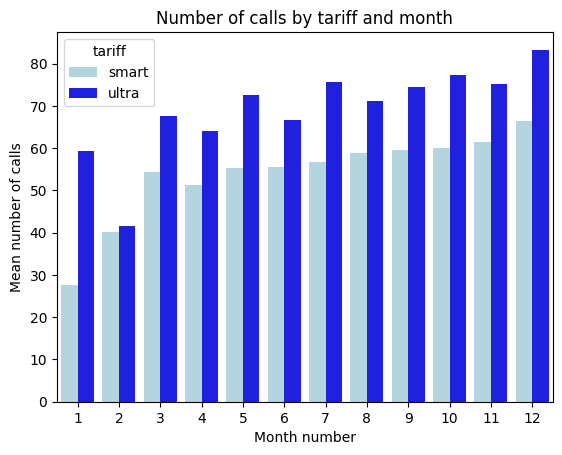

In [36]:
# Plotting the distribution of number of calls
ax = sns.barplot(
    x="month",
    y="calls_mean",
    hue="tariff",
    data=stats_df,
    palette=["lightblue", "blue"],
)

ax.set_title("Number of calls by tariff and month")
ax.set(xlabel="Month number", ylabel="Mean number of calls")
plt.show()

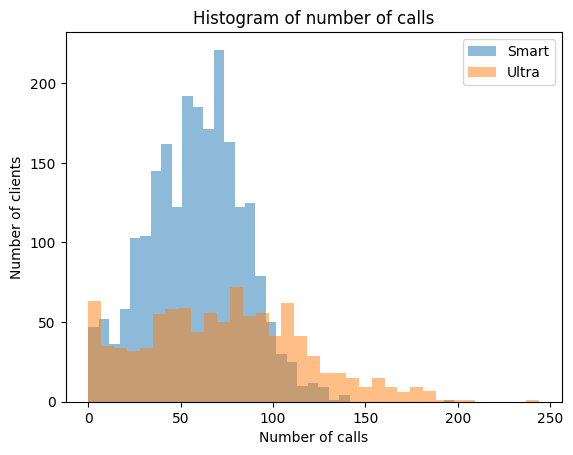

In [37]:
# Plotting the histogram
user_behavior.groupby("tariff")["calls"].plot(kind="hist", bins=35, alpha=0.5)

plt.legend(["Smart", "Ultra"])
plt.xlabel("Number of calls")
plt.ylabel("Number of clients")
plt.title("Histogram of number of calls")
plt.show()

It can be seen that users of "Ultra" tariff on average make more calls that those of "Smart" tariff throughout the year. Mean number of calls is increased for "Smart" tariff more or less steadily, while that for "Ultra" tariff users exhibits ups and downs but keeps moderately increasing.

#### Duration of calls

Next, consider call duration which can also be broken down into duration of calls by months and tariffs.

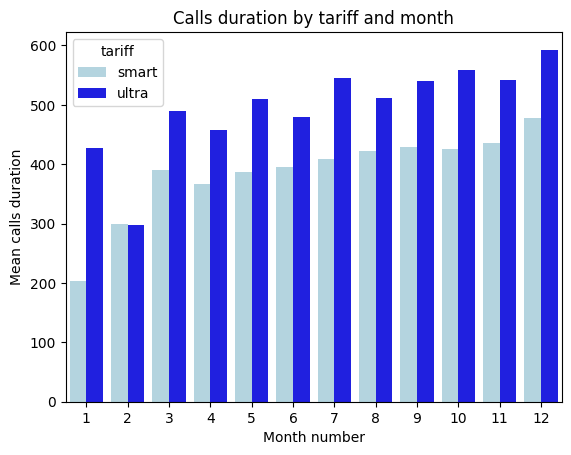

In [38]:
# Plotting the distribution of the call duration
ax = sns.barplot(
    x="month",
    y="minutes_mean",
    hue="tariff",
    data=stats_df,
    palette=["lightblue", "blue"],
)

ax.set_title("Calls duration by tariff and month")
ax.set(xlabel="Month number", ylabel="Mean calls duration")
plt.show()

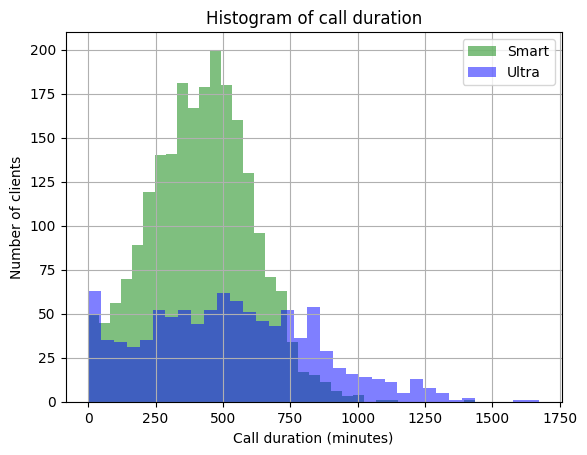

In [39]:
# Plotting the histogram
user_behavior[user_behavior["tariff"] == "smart"]["minutes"].hist(
    bins=35, alpha=0.5, color="green"
)
user_behavior[user_behavior["tariff"] == "ultra"]["minutes"].hist(
    bins=35, alpha=0.5, color="blue"
)

plt.xlabel("Call duration (minutes)")
plt.ylabel("Number of clients")
plt.title("Histogram of call duration")
plt.legend(["Smart", "Ultra"])
plt.show()

The average duration of conversations for subscribers of the "Ultra" tariff is longer than that for subscribers of "Smart" tariff. During the year, users of both tariffs increase the average duration of their conversations. The growth of the average duration of conversations among subscribers of "Smart" tariff is uniform throughout the year, whilst users of "Ultra" tariff do not show such linear stability. It is worth noting that in February, subscribers of both tariff plans had the lowest rates.

#### Number of messages

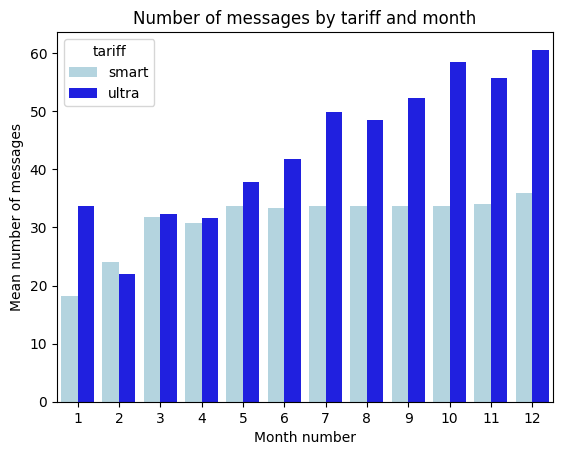

In [40]:
# Plotting
ax = sns.barplot(
    x="month",
    y="messages_mean",
    hue="tariff",
    data=stats_df,
    palette=["lightblue", "blue"],
)

ax.set_title("Number of messages by tariff and month")
ax.set(xlabel="Month number", ylabel="Mean number of messages")
plt.show()

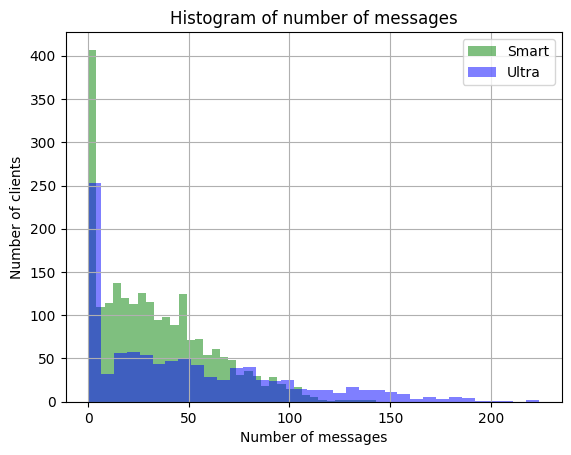

In [41]:
# Plotting the histogram
user_behavior[user_behavior["tariff"] == "smart"]["messages"].hist(
    bins=35, alpha=0.5, color="green"
)
user_behavior[user_behavior["tariff"] == "ultra"]["messages"].hist(
    bins=35, alpha=0.5, color="blue"
)

plt.xlabel("Number of messages")
plt.ylabel("Number of clients")
plt.title("Histogram of number of messages")
plt.legend(["Smart", "Ultra"])
plt.show()

On average, "Ultra" tariff users send more messages - almost 20 messages more than "Smart" tariff users. The number of messages during the year on both tariffs is growing. The dynamics of sending messages is similar to the trends in the duration of conversations: in February, the smallest number of messages for the year was noted and users of "Ultra" tariff also show a non-linear positive dynamics.

#### Internet traffic spent

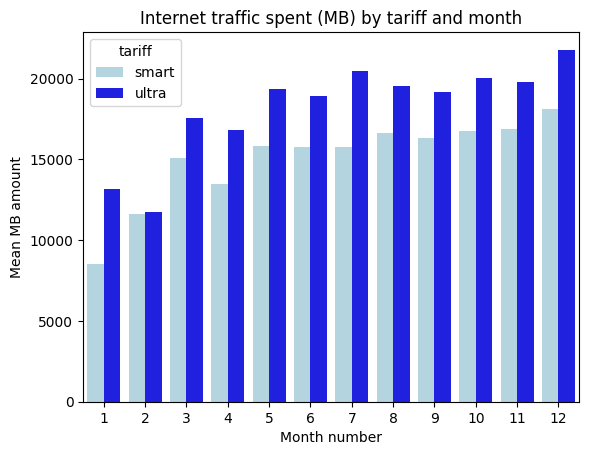

In [42]:
# Plotting
ax = sns.barplot(
    x="month",
    y="sessions_mean",
    hue="tariff",
    data=stats_df,
    palette=["lightblue", "blue"],
)

ax.set_title("Internet traffic spent (MB) by tariff and month")
ax.set(xlabel="Month number", ylabel="Mean MB amount")
plt.show()

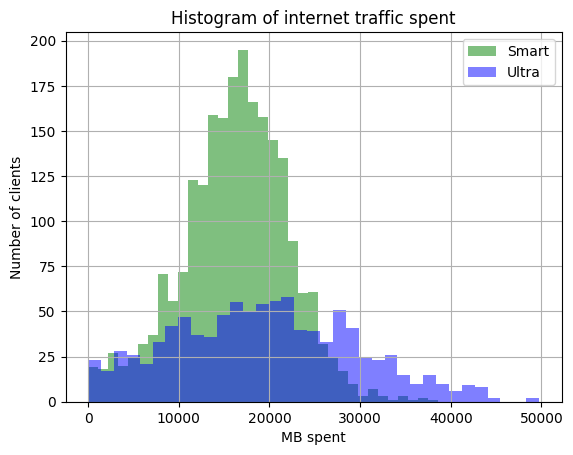

In [43]:
# Plotting
user_behavior[user_behavior["tariff"] == "smart"]["mb_used"].hist(
    bins=35, alpha=0.5, color="green"
)
user_behavior[user_behavior["tariff"] == "ultra"]["mb_used"].hist(
    bins=35, alpha=0.5, color="blue"
)

plt.xlabel("MB spent")
plt.ylabel("Number of clients")
plt.title("Histogram of internet traffic spent")
plt.legend(["Smart", "Ultra"])
plt.show()

The least amount of internet traffic spent by users can be seen in January, February and April. Most often, subscribers of "Smart" tariff spend 15-17 GB, and subscribers of "Ultra" tariff plan spend 19-21 GB.

**Conclusion**

The results of data visualizations conducted imply that "Ultra" users are more profitable for the company than "Smart" users. On average, these users are more active in terms of usage of "Ultra" tariff plan. 

## Hypotheses testing

#### Test 1

After conducting data visualization, we have found out that on average "Ultra" users spend more internet, send more messages, make longer calls and a larger amount of calls. Thus, it seems logical to assume that revenue brought by these users will be higher than that from "Smart" users. We can test such a hypothesis statistically. We formulate the following null and alternative hypotheses at 5% significance level:

```
H_0: Revenue (total_cost) of "Ultra" users = Revenue (total_cost) of "Smart" users
H_1: Revenue (total_cost) of "Ultra" users ≠ Revenue (total_cost) of "Smart" users
alpha = 0.05
```

In [44]:
# Conducting a statistical test 1
results = st.ttest_ind(
    user_behavior[user_behavior["tariff"] == "ultra"]["total_cost"],
    user_behavior[user_behavior["tariff"] == "smart"]["total_cost"],
    equal_var=False,
)

# Setting significance level
alpha = 0.05

# Printing p-value
print(f"p-value: {results.pvalue}")

# Outcome if accepting the null
test_results_H0 = "Test result: We cannot reject the null."

# Outcome if rejecting the null
test_results_H1 = "Test result: We reject the null."

# Determining the final outcome of the two-sided test
test_results = test_results_H1 if results.pvalue < alpha else test_results_H0

# Printing test results
print(test_results)

p-value: 4.2606313931076085e-250
Test result: We reject the null.


Thus, we have to reject the null hypothesis, which means that true average revenues of these two groups of users differ significantly. Hence, we can conduct another test, where we would test for average revenue of "Ultra" users being significantly higher than that for "Smart" users.

#### Test 2

```
H_0: Revenue (total_cost) of "Ultra" users = Revenue (total_cost) of "Smart" users
H_1: Revenue (total_cost) of "Ultra" users > Revenue (total_cost) of "Smart" users
alpha = 0.05
```

In [45]:
# Conducting a statistical test 2
results = st.ttest_ind(
    user_behavior[user_behavior["tariff"] == "ultra"]["total_cost"],
    user_behavior[user_behavior["tariff"] == "smart"]["total_cost"],
    equal_var=False,
)

# Computing mean revenues
ultra_revenue = user_behavior[user_behavior["tariff"] == "ultra"]["total_cost"].mean()
smart_revenue = user_behavior[user_behavior["tariff"] == "smart"]["total_cost"].mean()

# Printing p-value and mean revenues
print(f"p-value: {results.pvalue/2}")
print(f'Mean revenue from "Ultra" users: {ultra_revenue}')
print(f'Mean revenue from "Smart" users: {smart_revenue}')

# Determining the final outcome of the one-sided test
test_results = (
    test_results_H1
    if ((results.pvalue / 2 < alpha) and (ultra_revenue > smart_revenue))
    else test_results_H0
)

print(test_results)

p-value: 2.1303156965538042e-250
Mean revenue from "Ultra" users: 2070.1522842639592
Mean revenue from "Smart" users: 1289.9735307312696
Test result: We reject the null.


Thus, we reject the null hypothesis: mean revenue brought by "Ultra" users is higher than that from "Smart" tariff. Hence, we identified the optimal tariff plan for the company.

#### Test 3

Additionally, let's conduct another test and compare revenues from Moscow users and other users.

```
H_0: Revenue (total_cost) of Moscow users = Revenue (total_cost) of non-Moscow users
H_1: Revenue (total_cost) of Moscow users ≠ Revenue (total_cost) of non-Moscow users
alpha = 0.05
```

In [46]:
# Conducting a statistical test 3
results = st.ttest_ind(
    user_behavior[user_behavior["city"] == "Москва"]["total_cost"],
    user_behavior[user_behavior["city"] != "Москва"]["total_cost"],
    equal_var=False,
)

print(f"p-value: {results.pvalue}")

test_results = test_results_H1 if results.pvalue < alpha else test_results_H0

print(test_results)

p-value: 0.5257376663729298
Test result: We cannot reject the null.


In other words, mean revenues of Moscow and non-Moscow users are not statistically different from each other.

**Conclusion**

We have managed to identify a tariff that would be better for the company to focus on - "Ultra" tariff. Statistical tests confirm this point. 

## General conclusion

To recap, the data analysis of tariff plans offered by the company has been carried out. Initially having five different datasets, we have managed to aggregate information contained there to conduct data visualizations and statistical testing. The results of the present study indentified "Ultra" tariff as an optimal tariff plan that the company should invest in.  